# <code style="background:yellow;color:black;font-family:Roboto">DIABETES PREDICTION</code>

## 1. Importing Neccesary Libraries

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

## 2. Data Exploration
Finding any Null values,Changing Data type if Required,checking statistical relationship between different columns

In [5]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [22]:
df.shape

(100000, 9)

In [24]:
df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

We have   
0 -> Non-Diabetic Patients => 91500   
0 -> Non-Diabetic Patients => 91500   

#### Information of person having diabetes

In [25]:
df2 = df.query('diabetes == 1')
df2

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
99935,Female,65.0,1,1,never,33.55,8.2,140,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1
99962,Female,58.0,1,0,never,38.31,7.0,200,1


This Table represents that around 8500 people are diabetic

##### Checking for NULL values

In [26]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [28]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [84]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


#### Changing Data Type

In [30]:
df = df.astype({'age' : int})

# 3. Data  Visualization

## Count Plot
##### A count plot to diaplay the count  of the number of people who are diabeteic and non diabetic according to their gender

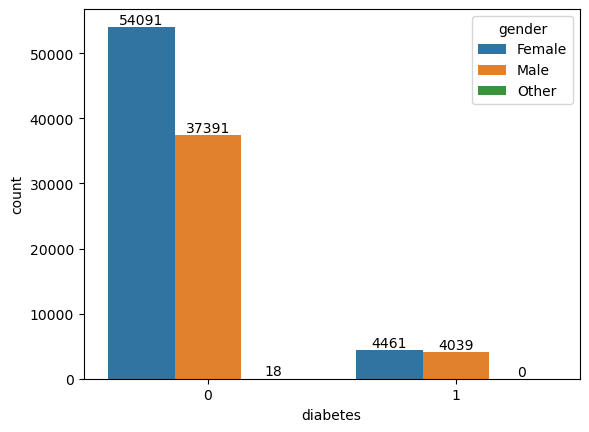

In [31]:
gen = sns.countplot(x='diabetes',data=df, hue='gender')
for bars in gen.containers:
    gen.bar_label(bars)

## Pie Chart
#### A pie chart to represent the view of Percentage of Non_diabetic vs Diabetic patients

Text(0.5, 1.0, 'Distribution of diabeties in dataset')

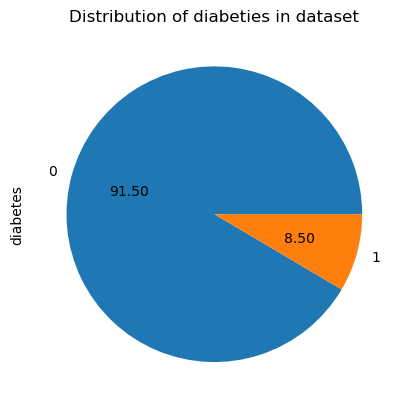

In [6]:
df['diabetes'].value_counts().plot(kind='pie',autopct='%0.2f')
plt.title("Distribution of diabeties in dataset")

## Box Plot
##### Box plot is used to highligth the major fators responsible for causing diabetes

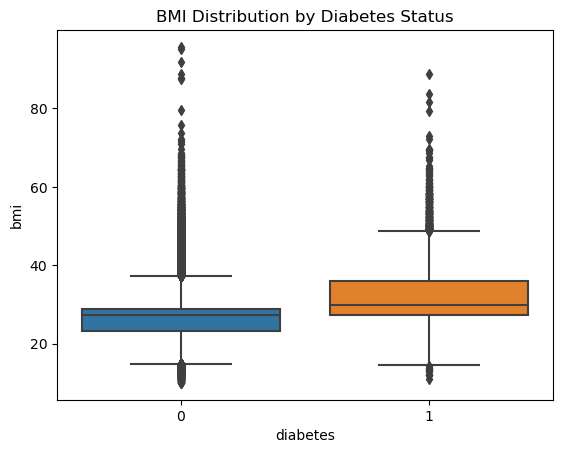

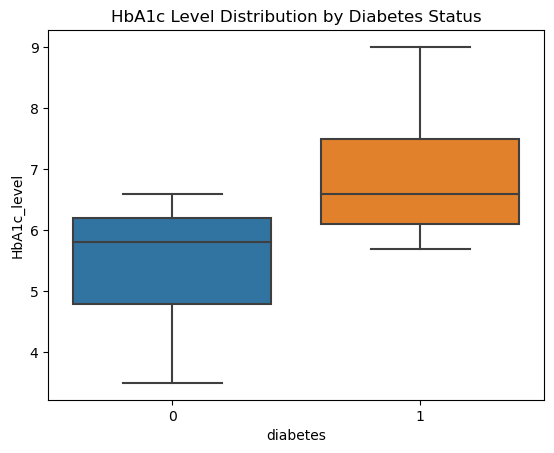

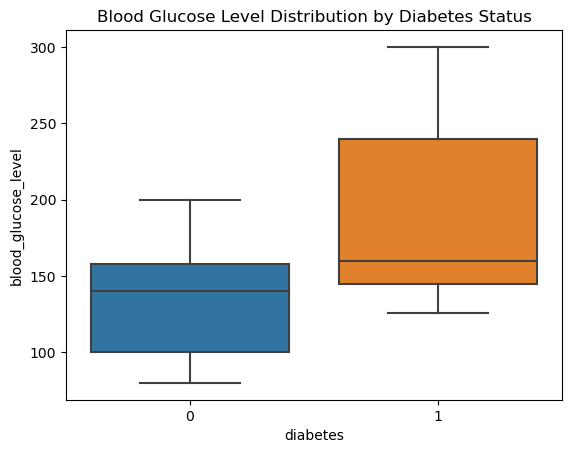

In [9]:
sns.boxplot(x='diabetes',y='bmi',data=df)
plt.title('BMI Distribution by Diabetes Status')
plt.show()

sns.boxplot(x='diabetes',y='HbA1c_level',data=df)
plt.title('HbA1c Level Distribution by Diabetes Status')
plt.show()

sns.boxplot(x='diabetes',y='blood_glucose_level',data=df)
plt.title('Blood Glucose Level Distribution by Diabetes Status')
plt.show()

### Conclusion    
#### The above Boxplots gives us the idea that people having bmi over 30 ,and hbac level over 6 and blood glucose level over 180 are having diabete

## 4. Spliting,Training and Testing Dataset

## Spliting the Dataset

#### Spliting the dataset into 80% Training and 20% Testing dataset

In [11]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:8],df.iloc[:,-1],test_size=0.3,stratify=df.iloc[:,-1],random_state=42)
X_train.shape, X_test.shape

((70000, 8), (30000, 8))

In [12]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
54534,Female,56.0,0,1,never,39.51,4.0,100
7286,Male,64.0,0,0,former,27.32,6.6,90
44496,Male,49.0,0,0,never,42.26,6.0,240
86010,Male,68.0,0,0,No Info,27.32,4.8,85
44954,Male,62.0,0,0,not current,30.64,5.7,145


## Feature Engineering

### One Hot Encoding
#### To Transform the catrgorical columns into numerical column

In [56]:

trf1 = ColumnTransformer([
    ('ohe_gender_smokinghistory', OneHotEncoder(sparse=False, handle_unknown='ignore'), 
     [0, 4])], 
     remainder='passthrough')

### Scaling
#### To scale doen the values between range [-1,1]

In [57]:
trf2 = ColumnTransformer([('scale', MinMaxScaler(), slice(0, 15))])

### Training The Model
#### Using DecisionTreeClassifier algorithm to train the model

In [58]:
classifier = DecisionTreeClassifier()

### Creating Pipeline

#### Using Pipeline to combine the transformers trf1 and trf2 with the classifier trf3 in a sequential manner.

In [60]:
pipe = make_pipeline(trf1, trf2, trf3)

In [61]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_gender_smokinghistory',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 4])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 15, None))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

## 5. Checking Accuracy

### Checking Accuarcy of Training Dataset     
Checking Accuarcy using Normal Method

In [63]:
y_pred1 = pipe.predict(X_train)
print('Accuracy of Training Dataset is: ',accuracy_score(y_train,y_pred1))

Accuracy of Training Dataset is:  0.9992285714285715


Checking Accuarcy using Cross Validation

In [70]:
print("Accuracy after Cross Validation: ",
      cross_val_score(pipe,X_train,y_train,cv=5,scoring='accuracy').mean())

Accuracy after Cross Validation:  0.9512285714285713


### Checking Accuarcy of Testing Dataset     
Checking Accuarcy using Normal Method

In [73]:
y_pred2 = pipe.predict(X_test)
print('Accuracy of Training Dataset is: ',accuracy_score(y_test,y_pred2))

Accuracy of Training Dataset is:  0.9520666666666666


Checking Accuarcy using Cross Validation

In [78]:
print("Accuarcy after Cross Validation: ",cross_val_score(pipe,X_test,y_test,cv=5,scoring='accuracy').mean())

Accuarcy after Cross Validation:  0.9533333333333334


## 6. Model Evaluation

#### Serializing and Deserialing the pipeline object to save and load the trained ML model

In [80]:
import pickle
pickle.dump(pipe,open('pipe.pkl1','wb'))

In [81]:
pipe = pickle.load(open('pipe.pkl1','rb'))

#### Testing Different Inputs for the Model
#### Test Case 1

In [82]:
test_input=np.array(['male',50,1,1,'current',32.8,6.3,230],dtype=object).reshape(1,8)
# Reshaping it to make into a 2D array of having 1 row with 8 different feature column representing the row of data
prediction=pipe.predict(test_input)
print(prediction)
if (prediction[0]==1):
    print("The Person is Diabetic")
else:
    print("The Person is Not Diabetic")

[1]
The Person is Diabetic


#### Test Case 2

In [83]:
test_input=np.array(['male',50,0,1,'former',31.8,6.1,100],dtype=object).reshape(1,8)
# Reshaping it to make into a 2D array of having 1 row with 8 different feature column representing the row of data
prediction=pipe.predict(test_input)
print(prediction)
if (prediction[0]==1):
    print("The Person is Diabetic")
else:
    print("The Person ais Not Diabetic")

[0]
The Person is Not Diabetic


#### Test Case 3

In [86]:
test_input=np.array(['female',30,1,0,'ever',28.5,7.1,110],dtype=object).reshape(1,8)
# Reshaping it to make into a 2D array of having 1 row with 8 different feature column representing the row of data
prediction=pipe.predict(test_input)
print(prediction)
if (prediction[0]==1):
    print("The Person is Diabetic")
else:
    print("The Person ais Not Diabetic")

[1]
The Person is Diabetic
